In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import surrogate
from tqdm import tqdm
import joblib

## 3D and cross section plot

In [2]:
config = dict()
config["PATH"] = "data/interval_cases/interval_heat_homogen.mat"
config["POD_RANK"] = 3
config["X1_DOMAIN"] = [2e3, 4e3]
config["X2_DOMAIN"] = [3, 5]
config["FIT_RANGE"] = True
total_data = 50

In [3]:
# It takes around 4-5 mins to finish on MacBook M1 Pro
config["N_TRAIN"] = 10
config["RESHAPE_SIZE"] = (10201,50)
_,_,snapshot_test, snapshot_pred,_ = surrogate.main(config)

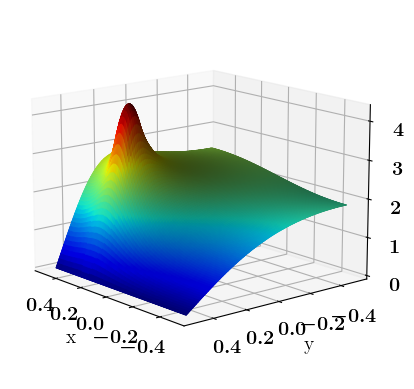

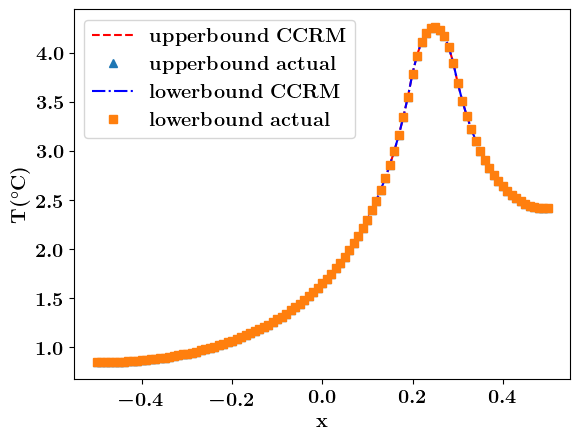

In [4]:
surrogate.field_plot(snapshot_test, snapshot_pred, sim_id=25, reshape_size=(101,101), cross_sec="images/cross_sect.png")

## POD Coeff Plot

In [14]:
config = dict()
config["PATH"] = "data/interval_cases/interval_heat_homogen.mat"
config["POD_RANK"] = 3
config["X1_DOMAIN"] = [2e3, 4e3]
config["X2_DOMAIN"] = [3, 5]
config["FIT_RANGE"] = False
total_data = 50

In [15]:
config["N_TRAIN"] = 15
config["RESHAPE_SIZE"] = (10201,50)
_,_,_,_, pod_coeff = surrogate.main(config)

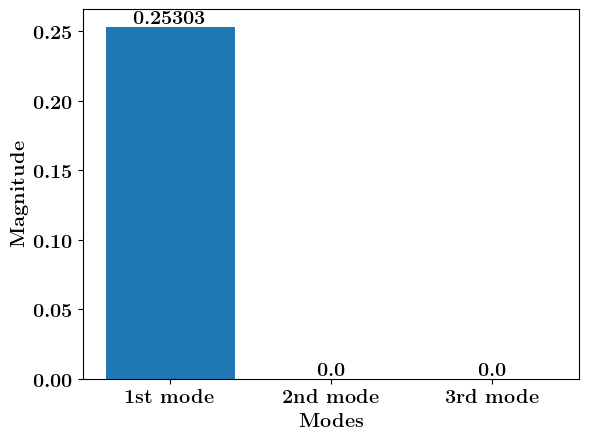

In [16]:
pod_modes = [r'\textbf{1st mode}', r'\textbf{2nd mode}', r'\textbf{3rd mode}']
mode_val = np.abs(np.mean(pod_coeff, axis=0))
vals = [str(np.round(a,5)) for a in mode_val]
vals = [r'\textbf{'+a+'}' for a in vals]

fig, ax = plt.subplots()
bar_container = ax.bar(pod_modes, mode_val)
ax.set(ylabel=r'\textbf{Magnitude}', xlabel=r'\textbf{Modes}')
ax.bar_label(bar_container,labels=vals, fontweight="bold")
plt.savefig("images/heat_pod_mag.png", dpi=400, format="png")
plt.show()

## RMSE Plot

In [ ]:
config = dict()
config["POD_RANK"] = 3
config["X1_DOMAIN"] = [2e3, 4e3]
config["X2_DOMAIN"] = [3, 5]
config["RESHAPE_SIZE"] = (10201,50)
total_data = 50

In [ ]:
# Performing multiple experiments: 
#   - Homogenous case with mean regression and CCRM 
#   - Heterogenous case with mean regression and CCRM

### HOMOGENOUS CASE
# load dataset
config["PATH"] = "data/interval_cases/interval_heat_homogen.mat"
# Mean regression
config["FIT_RANGE"] = False
rmse_l_ho_mean = []
rmse_u_ho_mean = []
data_fraction=[]
for i in tqdm([5,8,10,13,15]):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _ = surrogate.main(config)
    rmse_l_ho_mean.append(rmse_lobound)
    rmse_u_ho_mean.append(rmse_upbound)
    data_fraction.append(100 * i/total_data)
# CCRM
config["FIT_RANGE"] = True
rmse_l_ho_ccrm = []
rmse_u_ho_ccrm = []
data_fraction=[]
for i in tqdm([5,8,10,13,15]):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _ = surrogate.main(config)
    rmse_l_ho_ccrm.append(rmse_lobound)
    rmse_u_ho_ccrm.append(rmse_upbound)
    data_fraction.append(100 * i/total_data)

In [ ]:
### HETEROGENOUS CASE
# load data
config["PATH"] = "data/interval_cases/interval_heat_hetero.mat"
# Mean regression
config["FIT_RANGE"] = False
rmse_l_he_mean = []
rmse_u_he_mean = []
for i in tqdm([5,8,10,13,15]):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _ = surrogate.main(config)
    rmse_l_he_mean.append(rmse_lobound)
    rmse_u_he_mean.append(rmse_upbound)
# CCRM
config["FIT_RANGE"] = True
rmse_l_he_ccrm = []
rmse_u_he_ccrm = []
for i in tqdm([5,8,10,13,15]):
    config["N_TRAIN"] = i
    rmse_lobound, rmse_upbound, _, _ = surrogate.main(config)
    rmse_l_he_ccrm.append(rmse_lobound)
    rmse_u_he_ccrm.append(rmse_upbound)

In [ ]:
# Dumping data
data_dump = {"l_ho_mean":rmse_l_ho_mean,
             "u_ho_mean":rmse_u_ho_mean,
             "l_he_mean":rmse_l_he_mean,
             "u_he_mean":rmse_u_he_mean,
             "l_ho_ccrm":rmse_l_ho_ccrm,
             "u_ho_ccrm":rmse_u_ho_ccrm,
             "l_he_ccrm":rmse_l_he_ccrm,
             "u_he_ccrm":rmse_u_he_ccrm}
joblib.dump(data_dump,"normal_heat.pkl")

In [ ]:
# Plotting
meanreg_data = [rmse_l_ho_mean, rmse_u_ho_mean, rmse_l_he_mean, rmse_u_he_mean]
ccrm_data = [rmse_l_ho_ccrm, rmse_u_ho_ccrm, rmse_l_he_ccrm, rmse_u_he_ccrm]

surrogate.error_plot(meanreg_data, ccrm_data, data_fraction, savefile="images/heatcond.png")